In [85]:
from plastic import materials, HARDENING
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os.path as osp
import os
plt.rcParams.update({"text.usetex": True, "font.family": "Computer Modern"})

def generate_random_signal(T,N,p=1.5,u_max=0.2): 
    k = np.linspace(0, T, T)  
    a = np.random.randn(N)
    u = np.zeros_like(k)
    for n in range(1, N + 1):
        u += (a[n - 1] / n**p) * np.sin(2*np.pi*n*k/N)
    u = np.array(u)
    u = u/(np.max(u) - np.min(u))*u_max
    return u

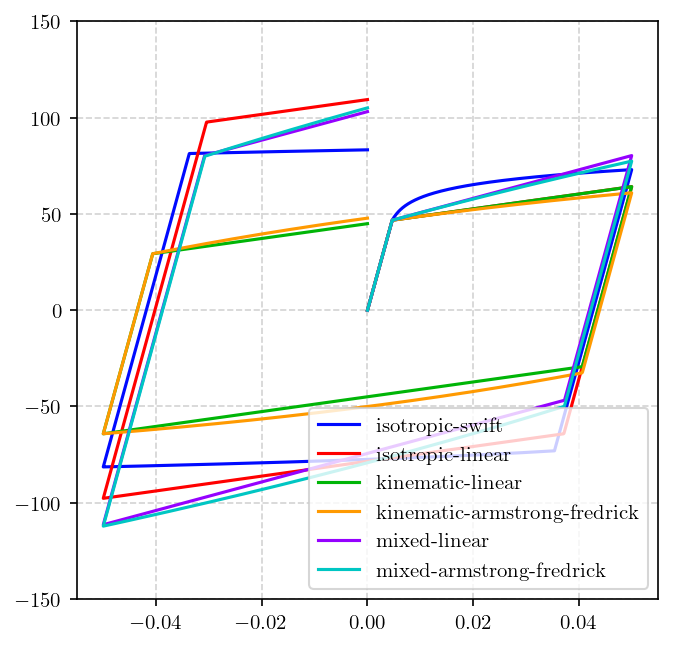

In [3]:
plt.figure(figsize=(5,5),dpi=150)
eps = np.concatenate([np.linspace(0,0.05,1000),np.linspace(0.05,-0.05,1000),np.linspace(-0.05,0,1000)])
for name in materials.keys():
    mat = materials[name]
    sig, alpha, Y = HARDENING(eps,mat['E'],mat['dalpha'],mat['Y'])
    plt.plot(eps,sig,label=name,color=materials[name]['color'])
plt.ylim(-150,150)
plt.legend()
plt.grid(ls='--',c='lightgray')
plt.show()

# New input but fixed length (T) and num freqs (N)

In [74]:
n_samples = 200
u_max = 0.05

u_list = []
for _ in tqdm(range(200)):
    u = generate_random_signal(T=150, N=100, p=2.5, u_max=2*u_max)
    u_list.append(u)
u_list = np.array(u_list)

100%|██████████| 200/200 [00:00<00:00, 2729.84it/s]


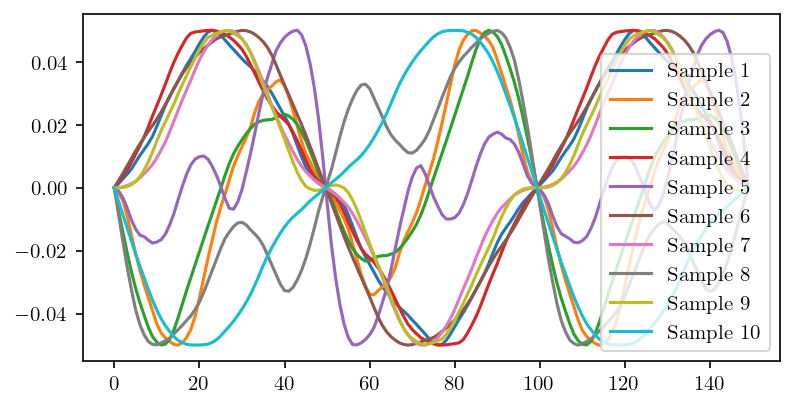

In [80]:
plt.figure(figsize=(6,3),dpi=150)
for i in range(10):
    plt.plot(u_list[i],label=f'Sample {i+1}',lw=1.5)
plt.legend()
plt.show()

In [86]:
name = 'isotropic-swift'
mat = materials[name]

y_list = np.array([HARDENING(eps,mat['E'],mat['dalpha'],mat['Y'])[0] for eps in tqdm(u_list)])

100%|██████████| 200/200 [00:02<00:00, 98.34it/s] 


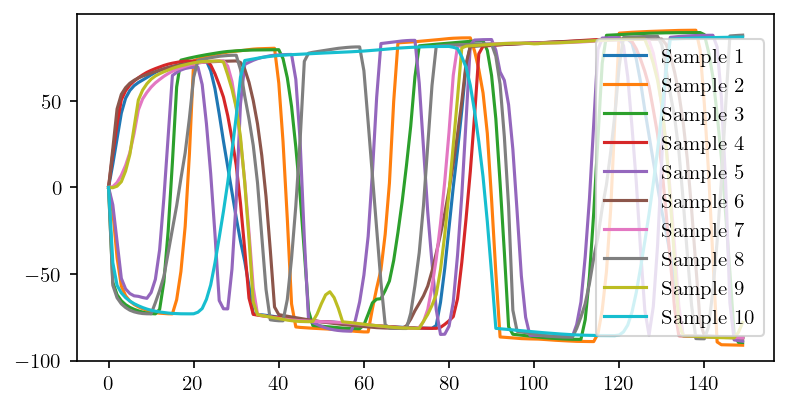

In [87]:
plt.figure(figsize=(6,3),dpi=150)
for i in range(10):
    plt.plot(y_list[i],label=f'Sample {i+1}',lw=1.5)
plt.legend()
plt.show()

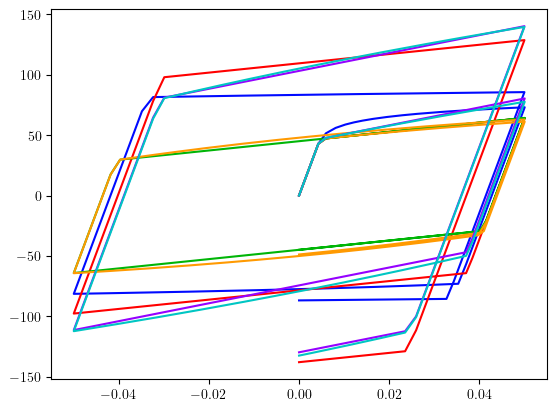

In [83]:
for name in materials.keys():
    mat = materials[name]
    eps = u_list[0]  # Use the first sample for all materials
    sig, alpha, Y = HARDENING(eps, mat['E'], mat['dalpha'], mat['Y'])
    plt.plot(eps, sig, label=name, color=mat['color'])

In [ ]:
for name in materials.keys():
    mat = materials[name]
    
    if not osp.exists(name): os.makedirs(name)
    
    # save the input
    np.save(osp.join(name, 'u_list.npy'), u_list)

    # calculate the stress response for each sample
    y_list = np.array([HARDENING(eps,mat['E'],mat['dalpha'],mat['Y'])[0] for eps in tqdm(u_list)])

    # save the output
    np.save(osp.join(name, 'y_list.npy'), y_list)

100%|██████████| 200/200 [00:03<00:00, 65.94it/s]


# Random length (T) and num freqs (N)

In [ ]:
n_samples = 200
u_max = 0.08

u_list = []
for i in tqdm(range(200)):
    T = np.random.randint(150,450)
    N = np.random.randint(100,300)
    p = np.random.uniform(1.5,2.5)
    u = generate_random_signal(T,N,p,u_max=u_max)

    for material in materials.keys():
        y, _ , _ = HARDENING(u,materials[material]['E'],materials[material]['dalpha'],materials[material]['Y'])
    
    u_list += [u]


100%|██████████| 200/200 [00:20<00:00,  9.98it/s]


Text(0.5, 0, 'Strain $\\varepsilon$')

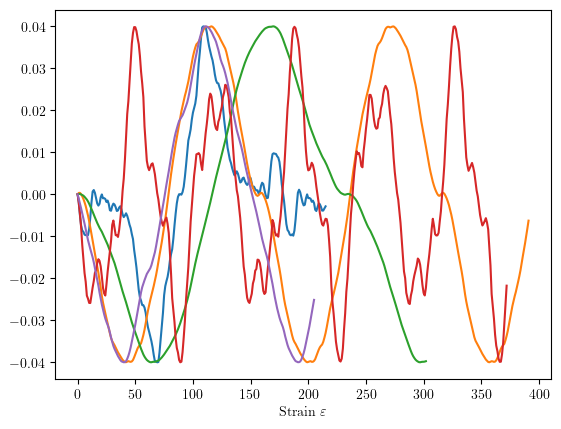

In [8]:
for i in range(5):
    plt.plot(u_list[i],label=f'Sample {i+1}',lw=1.5)
plt.xlabel(r'Strain $\varepsilon$')

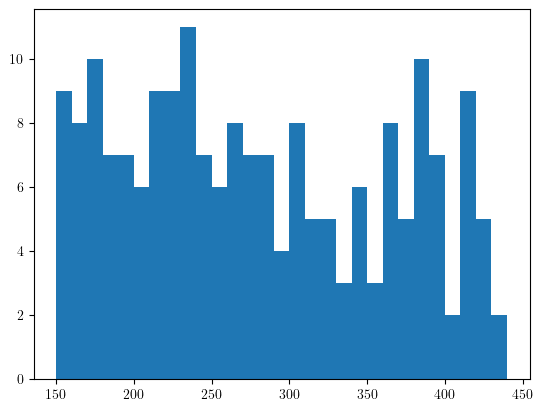

In [9]:
plt.hist([u.shape[0] for u in u_list],bins=range(150,450,10))
plt.show()